# Section 4.3 - Venus SmallSat Aerocapture - Interplanetary Approach

In [1]:
import numpy as np
from astropy.time import Time
from AMAT.arrival import Arrival

In [2]:
arrival = Arrival()
arrival.set_vinf_vec_from_lambert_arc(lastFlybyPlanet='EARTH',
                                      arrivalPlanet='VENUS',
                                      lastFlybyDate=Time("2010-05-10 00:00:00", scale='tdb'),
                                      arrivalDate=Time("2010-12-06 00:00:00", scale='tdb'),
                                      ephem_file='../../../spice-data/de432s.bsp')

In [3]:
print("Arrival v_inf vector, ICRF: "+str(arrival.v_inf_vec)+" km/s")
print("Arrival VINF MAG: "+str(round(arrival.v_inf_mag, 2))+" km/s.")
print("Arrival Declination: "+str(round(arrival.declination, 2))+" deg.")

Arrival v_inf vector, ICRF: [-3.26907095  0.67649492 -1.06977471] km/s
Arrival VINF MAG: 3.51 km/s.
Arrival Declination: -21.93 deg.


In [4]:
import numpy as np
from AMAT.approach import Approach

In [5]:
approach1 = Approach("VENUS", v_inf_vec_icrf_kms=arrival.v_inf_vec,
                            rp=(6051.8+103.85)*1e3, psi=np.pi,
                            is_entrySystem=True, h_EI=150e3)

print("Entry altitude, km: "+ str(approach1.h_EI/1e3))
print("Entry longitude BI, deg: "+ str(round(approach1.longitude_entry_bi*180/np.pi, 2)))
print("Entry latitude BI, deg: "+ str(round(approach1.latitude_entry_bi*180/np.pi, 2)))
print("Atm. relative entry speed, km/s: "+str(round(approach1.v_entry_atm_mag/1e3, 4)))
print("Atm. relative heading angle, deg: "+str(round(approach1.heading_entry_atm*180/np.pi, 4)))
print("Atm. relative EFPA, deg: "+str(round(approach1.gamma_entry_atm*180/np.pi, 4)))

print("Inclination, deg: "+str(approach1.i*180/np.pi))

Entry altitude, km: 150.0
Entry longitude BI, deg: -6.22
Entry latitude BI, deg: 23.28
Atm. relative entry speed, km/s: 10.8191
Atm. relative heading angle, deg: 89.991
Atm. relative EFPA, deg: -5.2008
Inclination, deg: 90.00000000000001


Run the following code to generate the approach trajectory plot. The code is also available in the file ```section-4-3-venus-smallsat-approach-viz.py```.

```
from mayavi import mlab
import numpy as np
from tvtk.tools import visual
from AMAT.approach import Approach
from astropy.time import Time
from AMAT.arrival import Arrival

def Arrow_From_A_to_B(x1, y1, z1, x2, y2, z2):
    ar1 = visual.arrow(x=x1, y=y1, z=z1)
    ar1.length_cone = 0.4

    arrow_length = np.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2 + (z2 - z1) ** 2)
    ar1.actor.scale = [arrow_length, arrow_length, arrow_length]
    ar1.pos = ar1.pos / arrow_length
    ar1.axis = [x2 - x1, y2 - y1, z2 - z1]
    return ar1

arrival = Arrival()
arrival.set_vinf_vec_from_lambert_arc(lastFlybyPlanet='EARTH',
                                      arrivalPlanet='VENUS',
                                      lastFlybyDate=Time("2010-05-10 00:00:00", scale='tdb'),
                                      arrivalDate=Time("2010-12-06 00:00:00", scale='tdb'))



probe = Approach("VENUS", v_inf_vec_icrf_kms=arrival.v_inf_vec,
                            rp=(6051.8+105)*1e3, psi=np.pi,
                            is_entrySystem=True, h_EI=150e3)


space = Approach("VENUS",
                    v_inf_vec_icrf_kms=arrival.v_inf_vec,
                 rp=(6051.8 + 400) * 1e3, psi=3*np.pi/2)

north_pole_bi_vec = probe.ICRF_to_BI(arrival.north_pole)

theta_star_arr_probe = np.linspace(-2.25, probe.theta_star_entry, 101)
pos_vec_bi_arr_probe = probe.pos_vec_bi(theta_star_arr_probe)/6051.8e3


theta_star_arr_space = np.linspace(-2.25, 0.0, 101)
pos_vec_bi_arr_space = space.pos_vec_bi(theta_star_arr_space)/6051.8e3

x_arr_probe = pos_vec_bi_arr_probe[0][:]
y_arr_probe = pos_vec_bi_arr_probe[1][:]
z_arr_probe = pos_vec_bi_arr_probe[2][:]

x_arr_space = pos_vec_bi_arr_space[0][:]
y_arr_space = pos_vec_bi_arr_space[1][:]
z_arr_space = pos_vec_bi_arr_space[2][:]


u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x = 1*np.outer(np.cos(u), np.sin(v))
y = 1*np.outer(np.sin(u), np.sin(v))
z = 1*np.outer(np.ones(np.size(u)), np.cos(v))

x1 = 1.040381198513972*np.outer(np.cos(u), np.sin(v))
y1 = 1.040381198513972*np.outer(np.sin(u), np.sin(v))
z1 = 1.040381198513972*np.outer(np.ones(np.size(u)), np.cos(v))


x_ring_1 = 1.1*np.cos(u)
y_ring_1 = 1.1*np.sin(u)
z_ring_1 = 0.0*np.cos(u)

x_ring_2 = 1.2*np.cos(u)
y_ring_2 = 1.2*np.sin(u)
z_ring_2 = 0.0*np.cos(u)

mlab.figure(bgcolor=(0,0,0))
s1 = mlab.mesh(x, y, z, color=(0.34,0.33,0.33))
s2 = mlab.mesh(x1, y1, z1, color=(0.34, 0.33,0.33), opacity=0.3)
r1 = mlab.plot3d(x_ring_1, y_ring_1, z_ring_1, color=(1,1,1), line_width=1, tube_radius=None)
#r2 = mlab.plot3d(x_ring_2, y_ring_2, z_ring_2, color=(1,1,1), line_width=1, tube_radius=None)

p1 = mlab.plot3d(x_arr_probe, y_arr_probe, z_arr_probe, color=(0,1,0), line_width=3, tube_radius=None)
#p2 = mlab.plot3d(x_arr_space, y_arr_space, z_arr_space, color=(0,0,1), line_width=3, tube_radius=None)


mlab.plot3d([0, 1.2 * north_pole_bi_vec[0]],
                   [0, 1.2 * north_pole_bi_vec[1]],
                   [0, 1.2 * north_pole_bi_vec[2]])

mlab.show()
```

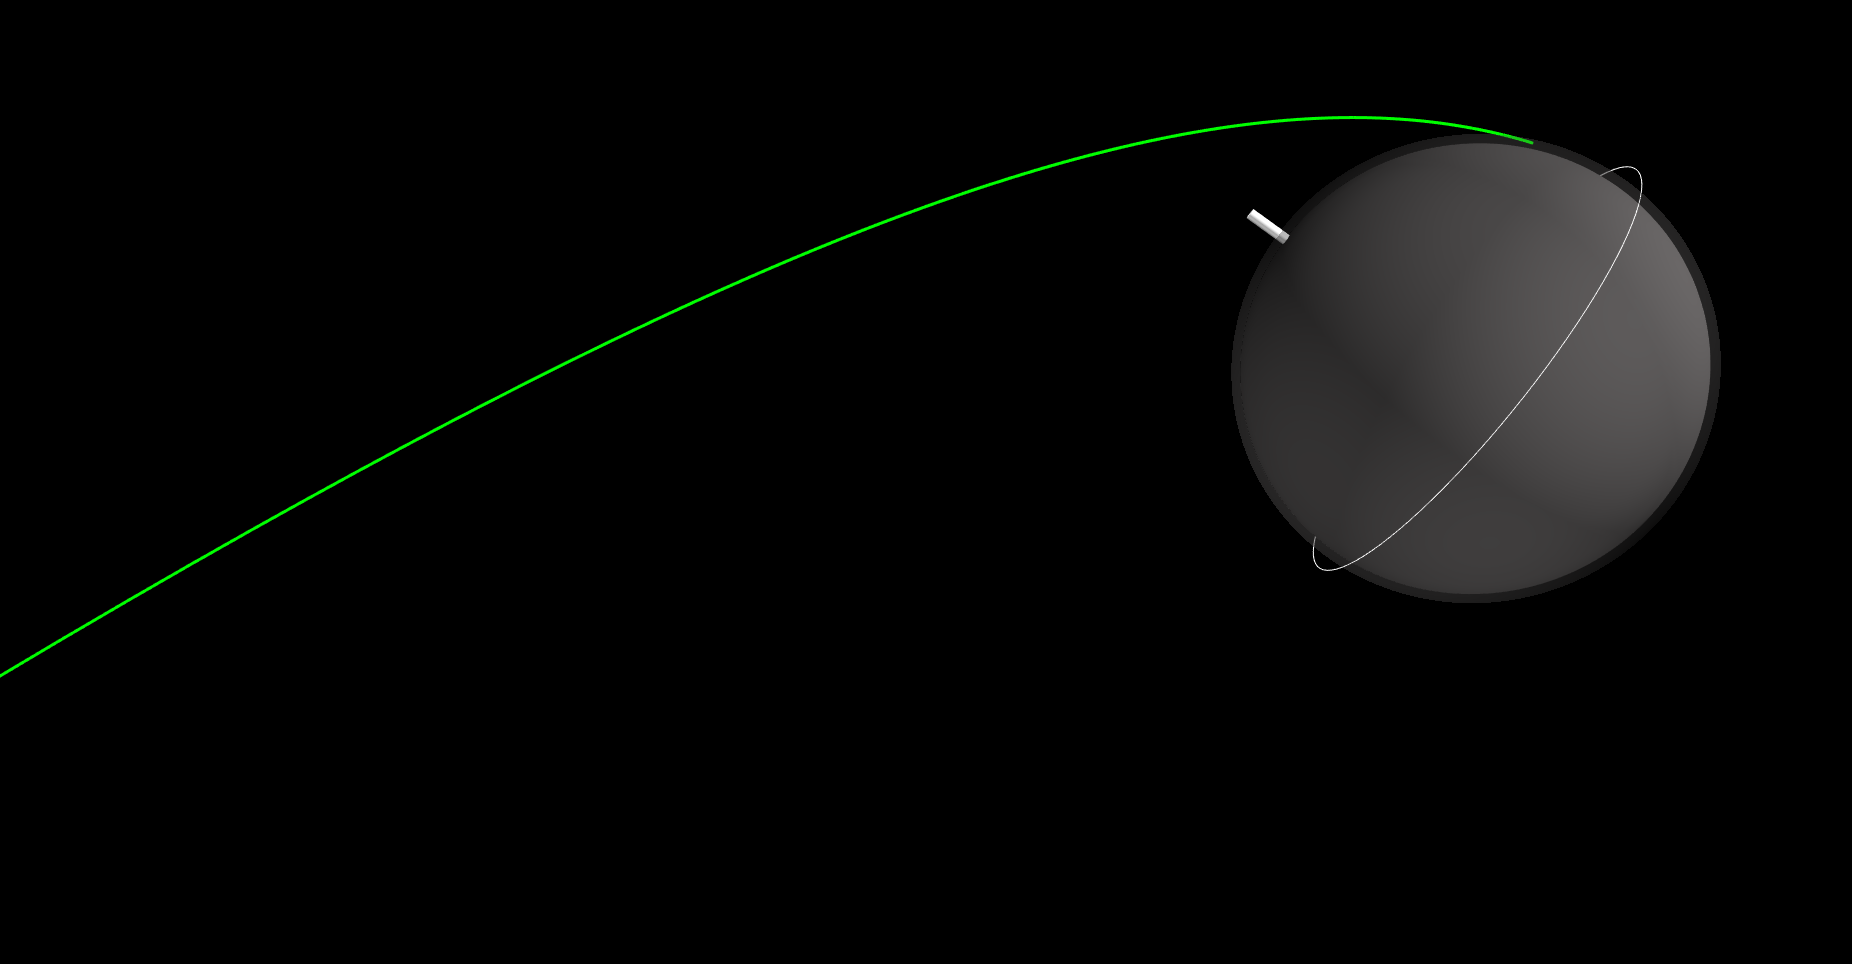

In [6]:
from IPython.display import Image
Image(filename='../../../plots/venus-smallsat-approach.png', width=1200)

In [7]:
from AMAT.orbiter import PropulsiveOrbiter

In [8]:
approach2 = Approach("VENUS", v_inf_vec_icrf_kms=arrival.v_inf_vec,
                            rp=(6051.8+200)*1e3, psi=np.pi)

In [9]:
orbiter = PropulsiveOrbiter(approach=approach2, apoapsis_alt_km=2000)

In [10]:
orbiter.DV_OI_mag

3131.626375180178

In [11]:
approach3 = Approach("VENUS", v_inf_vec_icrf_kms=arrival.v_inf_vec,
                            rp=(6051.8+400)*1e3, psi=np.pi)

/home/athul/Documents/Codes/AMAT/venv/lib/python3.8/site-packages/AMAT-2.2.20-py3.8.egg/AMAT/approach.py:480: RuntimeWarning: invalid value encountered in arccos
  gamma = -1*np.arccos(self.h/(r_mag_bi*v_mag_bi))


In [12]:
orbiter2 = PropulsiveOrbiter(approach=approach2, apoapsis_alt_km=150000)

In [13]:
orbiter2.DV_OI_mag

784.1738873565789